In [1]:
import os
import re

import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_3245423/2883611525.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
def find_immediate_folders_with_date(base_path, date_stamp):
    """
    Find immediate subfolders in base_path whose names contain the given date_stamp.

    Args:
        base_path (str): Path to the directory to search.
        date_stamp (str): Date string to match in folder names (e.g., '2025-05-01').

    Returns:
        list[str]: List of matching folder paths.
    """
    matching_folders = []

    for name in os.listdir(base_path):
        full_path = os.path.join(base_path, name)
        if os.path.isdir(full_path) and date_stamp in name and 'lag_performance.csv' in os.listdir(full_path):
            matching_folders.append(full_path)

    return matching_folders

find_immediate_folders_with_date('results', '2025-05-13')

['results/patch_dim_2_small_finetune_loss=nll_embedding_lr=0.001_wd=0.001_bs=128_grad_accum=1_2025-05-13-00-45-36',
 'results/patch_dim_2_small_finetune_loss=cosine_dist_lr=0.001_wd=0.001_bs=64_grad_accum=1_2025-05-13-01-43-55']

In [20]:
# paths = {
#     # 'glove': 'results/ensemble_model_10_glove_1745451192',
#     # 'gpt-2xl': 'results/ensemble_model_10_1745451877',
#     'arbitrary': 'results/ensemble_model_10_arbitrary_1745455852',
#     '798_grid_electrodes': 'results/ensemble_model_10_798_2025-04-28-21-17-38',
#     'foundation-mlp': 'results/foundation_model_no_norm_2025-04-29-05-50-12',
#     'foundation-attention': 'results/foundation_model_attention_no_norm_2025-04-29-05-55-12',
#     'foundation-finetuned-attention': 'results/foundation_finetune_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-03-27-49',
#     'foundation-finetuned-linear': 'results/foundation_finetune_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-05-33-55',
#     'foundation-scratch-attention': 'results/foundation_scratch_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-13-33-55',
#     'foundation-scratch-linear': 'results/foundation_scratch_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-13-33-55',
# }
paths = {
    '798_grid_electrodes': 'results/ensemble_model_10_798_2025-05-01-15-15-48',
    # 'foundation-mlp': 'results/foundation_model_no_norm_2025-05-01-14-36-26',
    # 'foundation-attention': 'results/foundation_model_attention_no_norm_2025-04-29-05-55-12',
    # 'foundation-full-attention': 'results/foundation_model_full_attention_numheads=8_2025-05-01-14-28-52',
    'foundation-frozen-linear': 'results/foundation_finetune_linear_frozen_num_unfrozen_blocks=1_dim=64_framepatchsize=16_patchsize=2_2025-05-01-06-08-51',
    # 'foundation-frozen-attention': 'results/foundation_finetune_attention_frozen_num_unfrozen_blocks=1_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-28-49',
    # 'foundation-finetuned-attention': 'results/foundation_finetune_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-03-27-49',
    'foundation-finetuned-linear': 'results/foundation_finetune_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-48-03',
    # 'foundation-scratch-attention': 'results/foundation_scratch_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-47-10',
    'foundation-scratch-linear': 'results/foundation_scratch_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-45-51',
}

paths = {
    '798_grid_electrodes': 'results/ensemble_model_10_798_2025-05-01-15-15-48',
    'foundation-mlp': 'results/foundation_model_improved_2025-05-09-15-28-09',
    'foundation-attention': 'results/foundation_model_attention_improved_model_2025-05-09-15-36-25',
    'foundation-full-attention': 'results/foundation_model_improved_model_full_attention_numheads=8_2025-05-09-15-36-22',
    'foundation-frozen-linear': 'results/foundation_finetune_improved_model_linear_frozen_num_unfrozen_blocks=1_dim=512_framepatchsize=16_patchsize=1_2025-05-11-09-00-38',
    'foundation-frozen-attention': 'results/foundation_finetune_improved_model_attention_frozen_num_unfrozen_blocks=1_dim=512_framepatchsize=16_patchsize=1_2025-05-11-08-55-38',
    'foundation-finetuned-attention': 'results/foundation_finetune_attention_improved_model_dim=512_framepatchsize=16_patchsize=1_2025-05-09-17-31-27',
    'foundation-finetuned-linear': 'results/foundation_finetune_improved_model_dim=512_framepatchsize=16_patchsize=1_2025-05-09-17-31-27',
    # 'foundation-scratch-attention': 'results/foundation_scratch_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-47-10',
    # 'foundation-scratch-linear': 'results/foundation_scratch_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-45-51',
}

paths = {
    '798_grid_electrodes': 'results/ensemble_model_10_798_2025-05-01-15-15-48',
    'frozen': 'results/patch_dim_2_small_finetune_num_unfrozen_blocks=1_2025-05-12-16-39-30',
    'finetune': 'results/patch_dim_2_small_finetune_2025-05-12-16-11-42',
    'cosine': 'results/patch_dim_2_small_finetune_loss=cosine_dist_2025-05-12-20-20-06',
    'nll': 'results/patch_dim_2_small_finetune_loss=nll_embedding_2025-05-12-21-07-23',
    'high-lr': 'results/patch_dim_2_small_finetune_loss=nll_embedding_lr=0.001_wd=0.01_bs=128_grad_accum=1_2025-05-12-22-01-06',
    'old': 'results/foundation_finetune_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-05-01-14-48-03',
}

# WD NLL PATHS
paths = {
    '798_grid_electrodes': 'results/ensemble_model_10_798_2025-05-01-15-15-48',
    'cos': 'results/patch_dim_2_small_finetune_loss=cosine_dist_lr=0.001_wd=0.001_bs=64_grad_accum=1_2025-05-13-01-43-55',
    'wd=0.0001': 'results/patch_dim_2_small_finetune_loss=nll_embedding_2025-05-12-21-07-23',
    'wd=0.01': 'results/patch_dim_2_small_finetune_loss=nll_embedding_lr=0.001_wd=0.01_bs=128_grad_accum=1_2025-05-12-22-01-06',
    'wd=0.001': 'results/patch_dim_2_small_finetune_loss=nll_embedding_lr=0.001_wd=0.001_bs=128_grad_accum=1_2025-05-13-00-45-36',
}

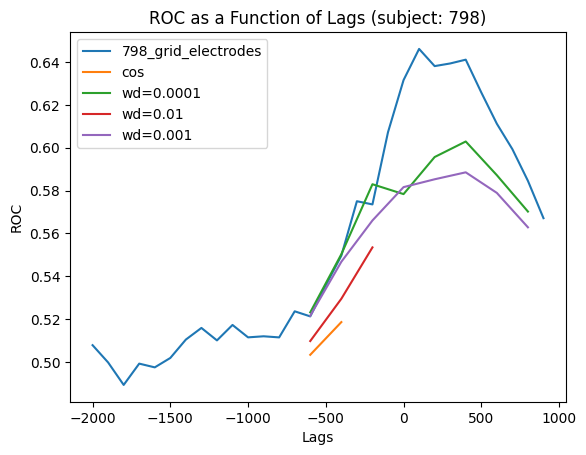

In [21]:
for name, path in paths.items():
    df = pd.read_csv(os.path.join(path, 'lag_performance.csv'))
    plt.plot(df.lags, df.rocs, label=name)
plt.legend()
plt.title('ROC as a Function of Lags (subject: 798)')
plt.xlabel('Lags')
plt.ylabel('ROC')
plt.show()

In [14]:
def plot_metrics_with_error_bars(df_dict, splits=['train', 'val', 'test']):
    """
    Args:
        df_dict: dict mapping names to dataframes, e.g., {"Model A": df1, "Model B": df2}
        lags: list of x-values
    """
    # First, find all unique metric names across all dataframes
    df_metric_dict = {key: df[df.columns[(df.columns != 'lags') & (df.columns != 'rocs')]] for key, df in df_dict.items()}
    all_columns = set(col for df in df_metric_dict.values() for col in df.columns)
    metric_names = sorted(set(
        re.sub(r'^(train|val|test)_(.+)_(mean|std)$', r'\2', col)
        for col in all_columns
        if re.match(r'^(train|val|test)_.+_(mean|std)$', col)
    ))

    for metric in metric_names:
        plt.figure(figsize=(8, 5))
        for label, df in df_dict.items():
            for split in splits:
                mean_col = f"{split}_{metric}_mean"
                std_col = f"{split}_{metric}_std"

                if mean_col in df.columns and std_col in df.columns:
                    plt.errorbar(
                        df.lags,
                        df[mean_col],
                        yerr=df[std_col],
                        label=f"{label} ({split})",
                        capsize=3,
                        marker='o',
                        linestyle='-'
                    )

        plt.title(f"{metric.replace('_', ' ').title()} Across Lags")
        plt.xlabel("Lag")
        plt.ylabel(metric.replace('_', ' ').title())
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [17]:
df_metric_dict['nll']

,train_nll_embedding_mean,train_mse_mean,train_cosine_sim_mean,val_nll_embedding_mean,val_mse_mean,val_cosine_sim_mean,test_nll_embedding_mean,test_mse_mean,test_cosine_sim_mean,num_epochs_mean,...,train_cosine_sim_std,val_nll_embedding_std,val_mse_std,val_cosine_sim_std,test_nll_embedding_std,test_mse_std,test_cosine_sim_std,num_epochs_std,lags,rocs
0,4.516418,86.709424,0.358550,4.843959,144.788227,0.078295,4.807958,87.684837,0.068703,17.2,...,0.040192,0.004939,52.585060,0.010365,0.007082,2.583179,0.015848,2.638181,-600,0.523143
1,4.501767,86.506760,0.373912,4.845867,115.749755,0.091684,4.796587,87.633069,0.075441,20.2,...,0.029028,0.006013,11.141269,0.009724,0.004938,2.545113,0.008412,2.039608,-400,0.550300
2,4.520842,86.192056,0.353454,4.845926,164.281085,0.111420,4.773595,87.189865,0.102618,15.8,...,0.018296,0.007858,40.500771,0.009359,0.006375,2.613146,0.006318,1.326650,-200,0.582943
3,4.504438,86.072321,0.371597,4.845208,149.081732,0.131888,4.759357,87.016153,0.115680,16.8,...,0.035783,0.011411,21.026928,0.005845,0.006024,2.591855,0.003112,3.124100,0,0.578342
4,4.508160,86.136133,0.367290,4.846293,148.372837,0.138720,4.750713,86.798177,0.129986,17.0,...,0.015547,0.006320,49.840095,0.009486,0.004643,2.585797,0.008009,1.673320,200,0.595644


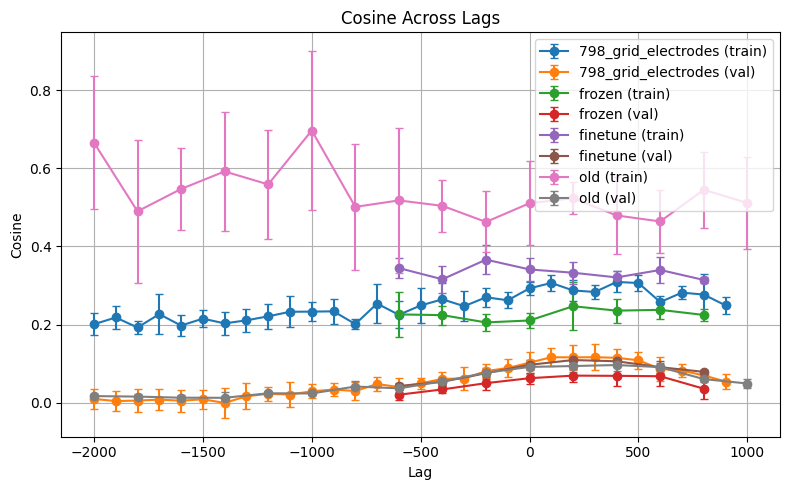

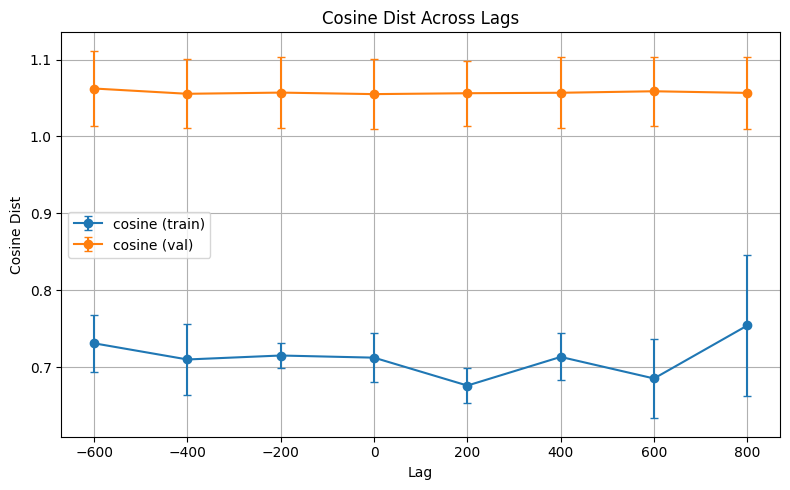

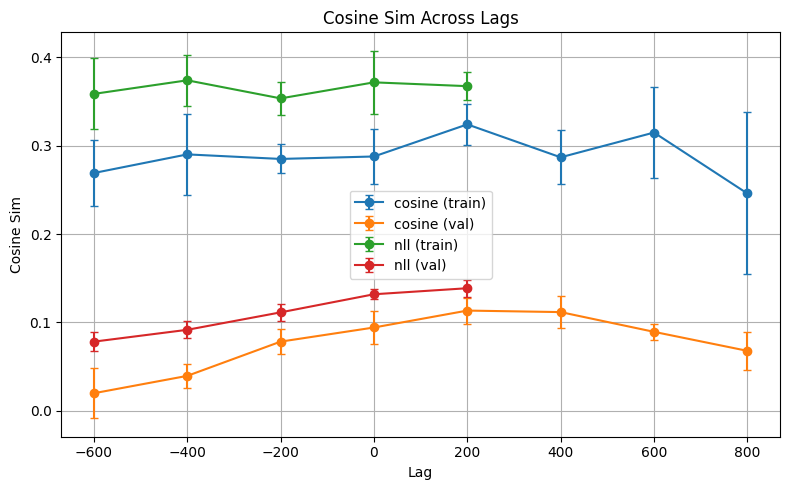

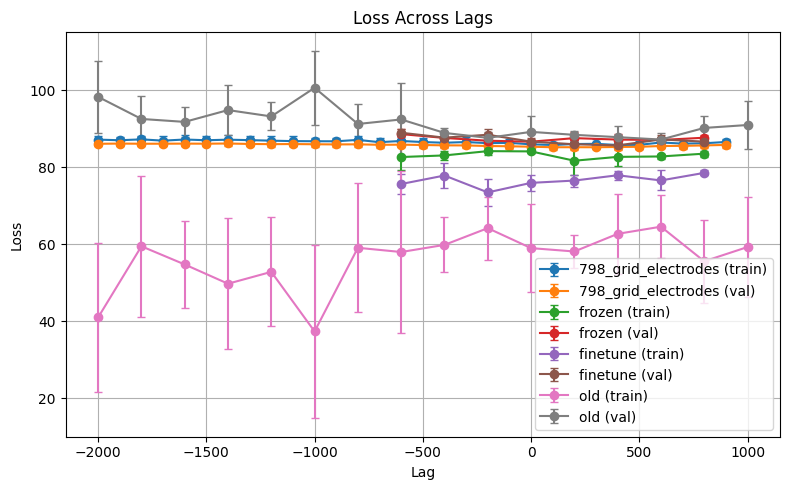

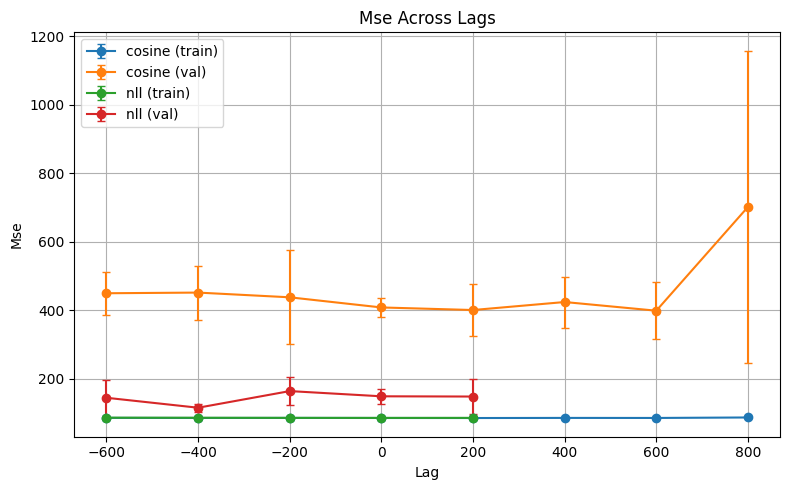

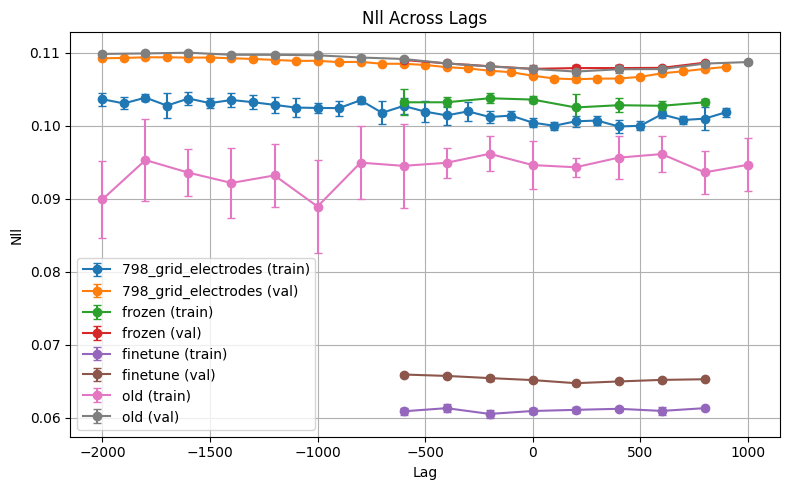

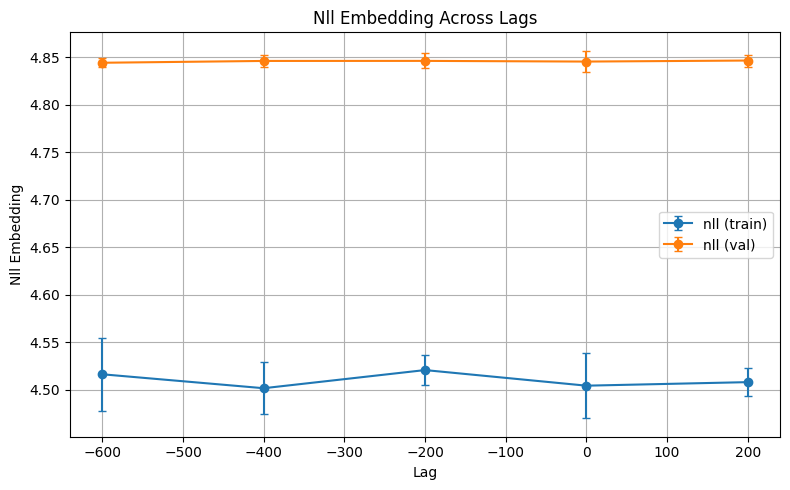

In [15]:
df_metric_dict = {}
for name, path in paths.items():
    df = pd.read_csv(os.path.join(path, 'lag_performance.csv'))
    df_metric_dict[name] = df
plot_metrics_with_error_bars(df_metric_dict, ['train', 'val'])

TODO:
1. Check with zero-shot (no word repeated).
2. Try with different loss functions!
3. Get closest to word onset patches and run convolutional network.
4. Freezing layers finetuning.
5. Try models with more bands.
6. Cross training on other subjects.
7. Support configurable loss (try with cosine loss)
8. Support configurable metrics for different tasks (NLoglikelihood, binary accuracy, p[recision recall, etc)
9. Summary metrics needed?
10. Support sub-second windows

## Summarize Attention Results

In [4]:
import argparse
from collections import defaultdict
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from scipy.stats import entropy as entropy_fn

from config import DataParams, dict_to_config
from data_utils import load_raws, load_word_data, get_data
from loader import import_all_from_package
from main import load_config
import registry
import_all_from_package("foundation_model")

In [5]:
def get_spatiotemporal_patch_indices(
    n_frames: int,
    height: int,
    width: int,
    frame_patch_size: int,
    patch_size: int,
):
    """
    For each latent token in a spatiotemporal patch embedding, return the
    starting index in the original input (height, width, time).
    
    Returns:
        List of (h_idx, w_idx, t_idx) for each patch
    """
    assert n_frames % frame_patch_size == 0, "Frames must be divisible by frame_patch_size"
    assert height % patch_size == 0, "Height must be divisible by patch_size"
    assert width % patch_size == 0, "Width must be divisible by patch_size"
    
    n_t = n_frames // frame_patch_size
    n_h = height // patch_size
    n_w = width // patch_size
    
    indices = []
    for t in range(n_t):
        for h in range(n_h):
            for w in range(n_w):
                h_idx = h * patch_size
                w_idx = w * patch_size
                t_idx = t * frame_patch_size
                indices.append((h_idx, w_idx, t_idx))
    
    return indices


def plot_attention_by_time_ms_centered(
    attention_weights: np.ndarray,
    patch_indices: list[tuple[int, int, int]],
    frame_patch_size: int,
    sample_rate: float,
    lag: float,
    plot: bool = True,
    return_values: bool = False,
):
    """
    Plots and analyzes average attention over time-aligned patches.
    Median time index is aligned with `lag` in ms.
    Computes entropy of the average attention distribution.

    Returns:
        entropy (float), and optionally time_ms, avg_attention_per_time
    """

    assert attention_weights.shape[1] == len(patch_indices), \
        "Mismatch between number of patches and patch indices"

    # Group patch indices by time index
    time_to_patch_ids = defaultdict(list)
    all_time_indices = []
    for patch_id, (_, _, t_idx) in enumerate(patch_indices):
        time_to_patch_ids[t_idx].append(patch_id)
        all_time_indices.append(t_idx)

    t_median = np.median(all_time_indices)

    # Compute real time (in ms) of each patch's start relative to the lag
    time_values = sorted(time_to_patch_ids.keys())
    time_ms = []
    avg_attention_per_time = []

    for t in time_values:
        patch_ids = time_to_patch_ids[t]
        mean_attention = attention_weights[:, patch_ids].mean()
        time_relative_to_lag = lag + ((t - t_median) / sample_rate) * 1000
        time_ms.append(time_relative_to_lag)
        avg_attention_per_time.append(mean_attention)

    # Normalize attention weights to get a probability distribution
    probs = np.array(avg_attention_per_time)
    probs = probs / probs.sum()

    # Compute entropy (natural log)
    attention_entropy = entropy_fn(probs)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.bar(time_ms, avg_attention_per_time,
                width=(frame_patch_size / sample_rate) * 1000,
                align='center')
        plt.axvline(lag, color='r', linestyle='--', label=f'Lag = {lag} ms')
        plt.xlabel("Time relative to word onset (ms)")
        plt.ylabel("Average Attention Weight")
        plt.title(f"Attention over Time (Entropy = {attention_entropy:.3f})")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    if return_values:
        return attention_entropy, time_ms, avg_attention_per_time
    else:
        return attention_entropy

In [6]:
def analyze_attention(config_path: str, trial_name: str, batch_size: int = 32):
    # Load config
    experiment_config = load_config(config_path)

    # Load all data
    raws = load_raws(experiment_config.data_params)
    df_word = load_word_data(experiment_config.data_params)

    # Allow user-defined function to alter config if necessary
    if experiment_config.config_setter_name:
        config_setter_fn = registry.config_setter_registry[
            experiment_config.config_setter_name
        ]
        experiment_config = config_setter_fn(experiment_config, raws, df_word)

    # User-defined preprocessing function
    preprocessing_fn = None
    if experiment_config.data_params.preprocessing_fn_name:
        preprocessing_fn = registry.data_preprocessor_registry[
            experiment_config.data_params.preprocessing_fn_name
        ]

    # User-defined model constructor function
    model_constructor_fn = registry.model_constructor_registry[
        experiment_config.model_constructor_name
    ]

    trial_model_dir = os.path.join('models', trial_name)
    lag_folders = os.listdir(trial_model_dir)
    lags = sorted([int(folder_name[4:]) for folder_name in lag_folders])

    for lag in lags:
        # Load data for the lag
        X, Y, selected_words = get_data(
            lag, raws, df_word, 1, preprocessing_fn,
            preprocessor_params=experiment_config.data_params.preprocessor_params
        )
        X = torch.FloatTensor(X)
        Y = torch.FloatTensor(Y)

        # Setup cross-validation
        kf = KFold(n_splits=5, shuffle=False)
        fold_indices = list(kf.split(range(X.shape[0])))

        model_dir = os.path.join(trial_model_dir, f'lag_{lag}')
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        lag_attn_weights = []
        for fold, (train_val_idx, test_idx) in enumerate(fold_indices):
            model_path = os.path.join(model_dir, f"best_pitom_model_fold{fold+1}.pt")
            model = model_constructor_fn(experiment_config.model_params)
            model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
            model.to(device)
            model.eval()

            X_test, Y_test = X[test_idx], Y[test_idx]
            test_dataset = TensorDataset(X_test, Y_test)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            fold_attn_weights = []
            with torch.no_grad():
                for inputs, targets in test_loader:
                    inputs, targets = inputs.to(device), targets.to(device)
                    outputs, attn_weights = model(inputs, return_weights=True)
                    fold_attn_weights.append(attn_weights.cpu().numpy())

            lag_attn_weights.append(fold_attn_weights)

        # Process attention weights
        lag_attn_weights = [np.concatenate(weights).squeeze() for weights in lag_attn_weights]
        lag_attn_weights = np.concatenate(lag_attn_weights)

        # Plot and compute entropy
        ecog_config = experiment_config.model_params['foundation_model_config']
        model_config = ecog_config.video_mae_task_config.vit_config
        frame_patch_size = model_config.frame_patch_size
        patch_size = model_config.patch_size
        num_frames = int(
                ecog_config.ecog_data_config.sample_length * ecog_config.ecog_data_config.new_fs
            )
        patch_indices = get_spatiotemporal_patch_indices(num_frames, 8, 8, frame_patch_size, patch_size)
        entropy_val = plot_attention_by_time_ms_centered(
            lag_attn_weights, patch_indices, frame_patch_size, ecog_config.ecog_data_config.new_fs, lag
        )

/tmp/ipykernel_2872759/778602151.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  Y = torch.FloatTensor(Y)


Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


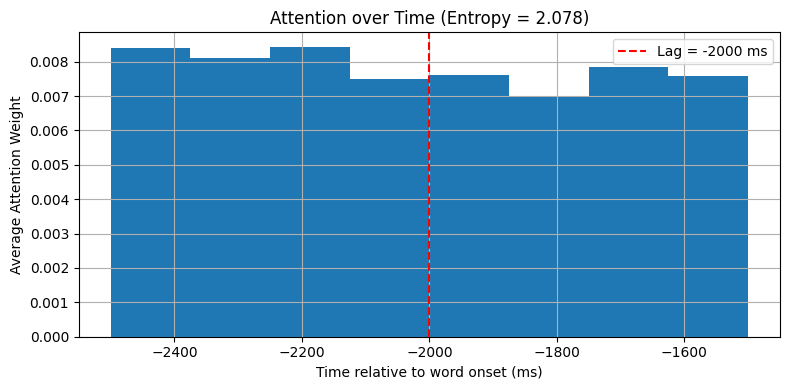

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


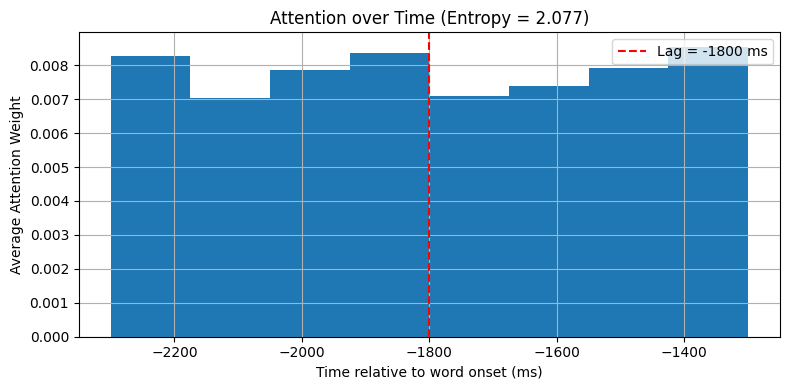

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


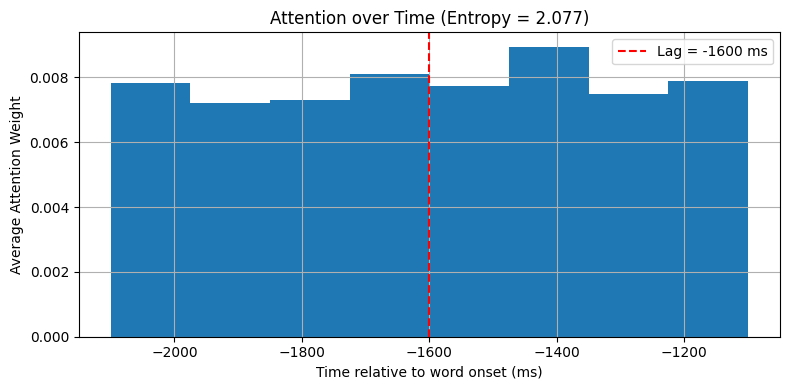

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


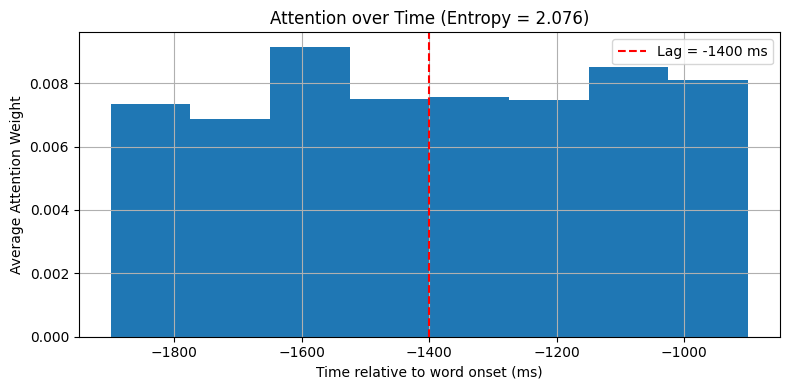

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


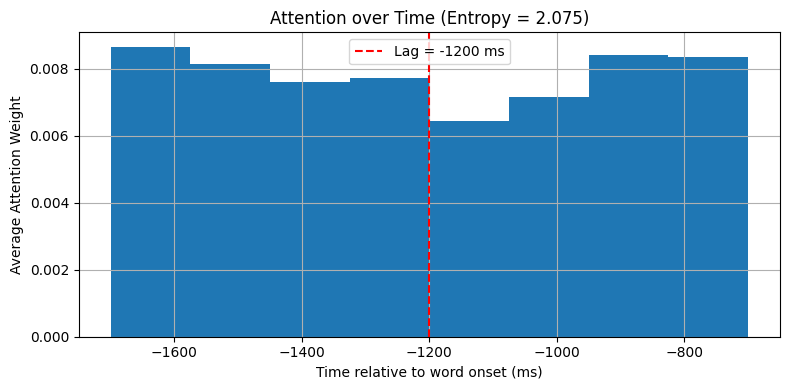

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


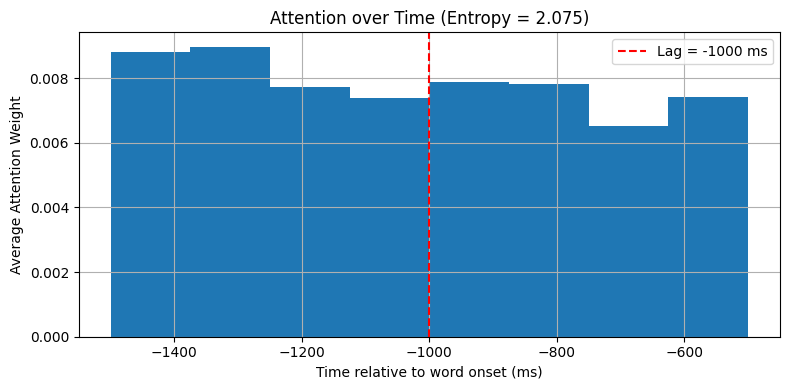

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


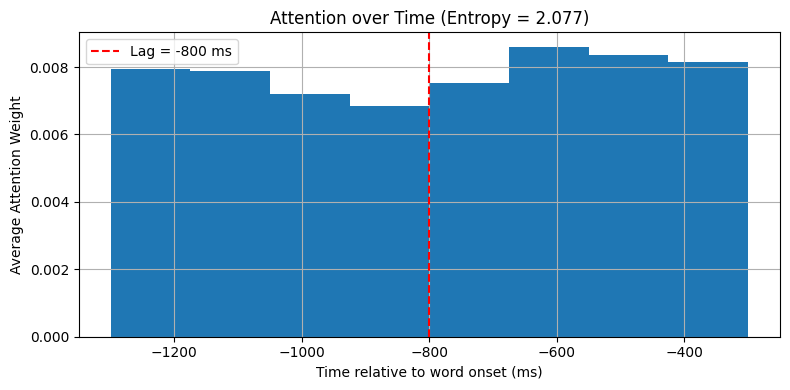

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


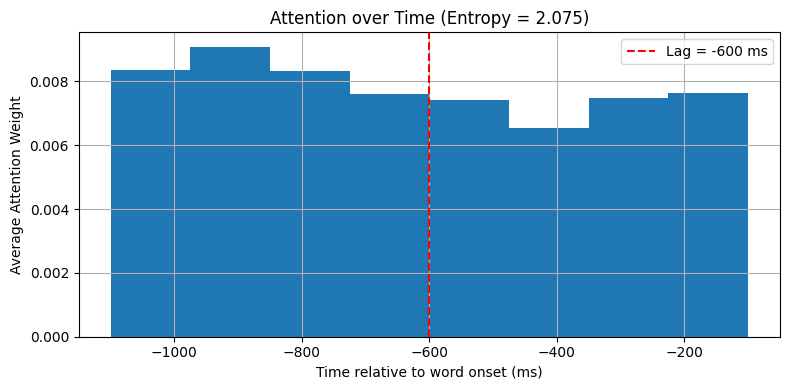

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


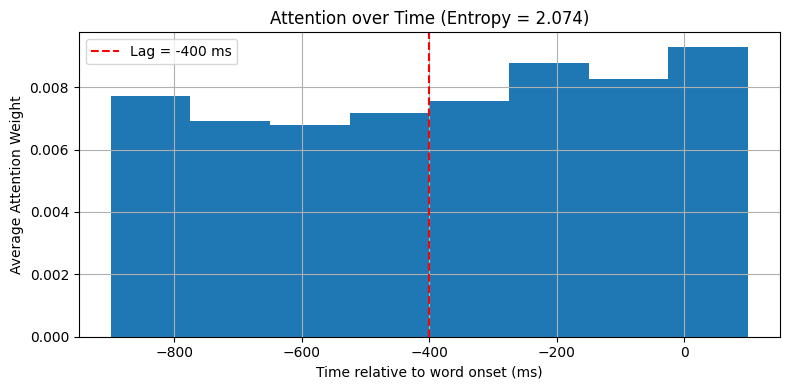

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


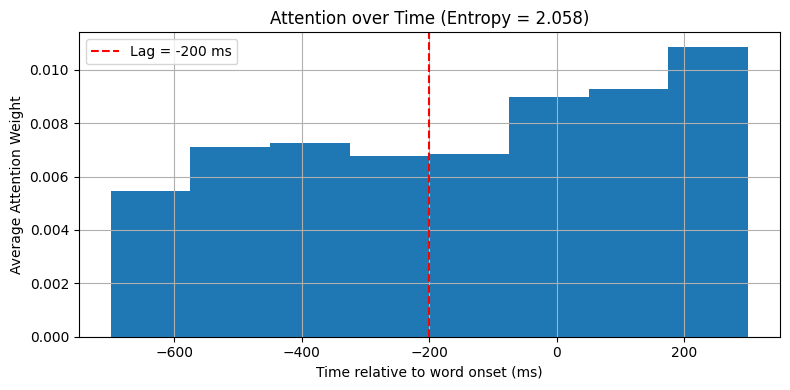

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


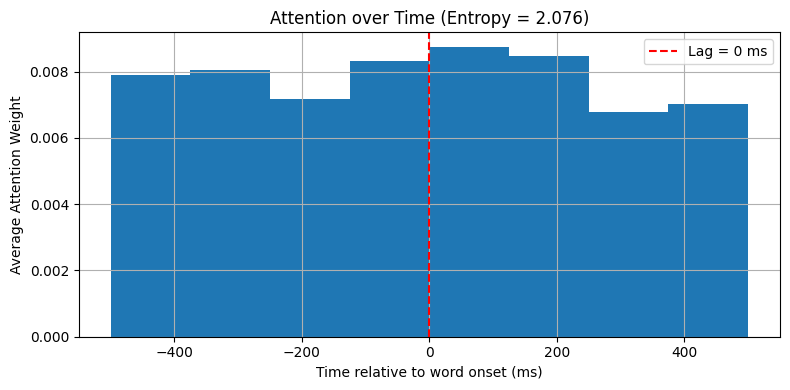

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


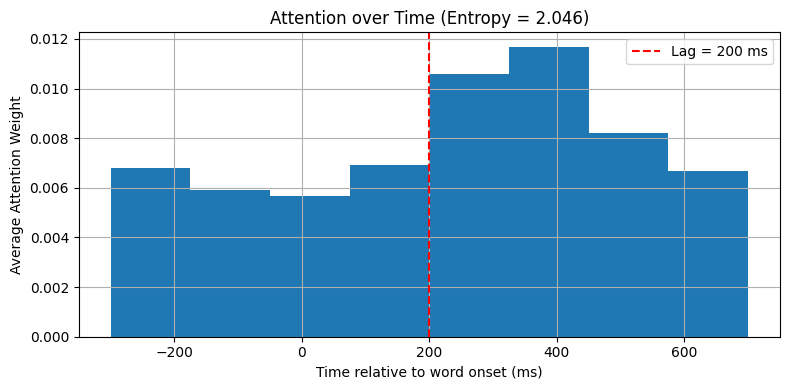

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


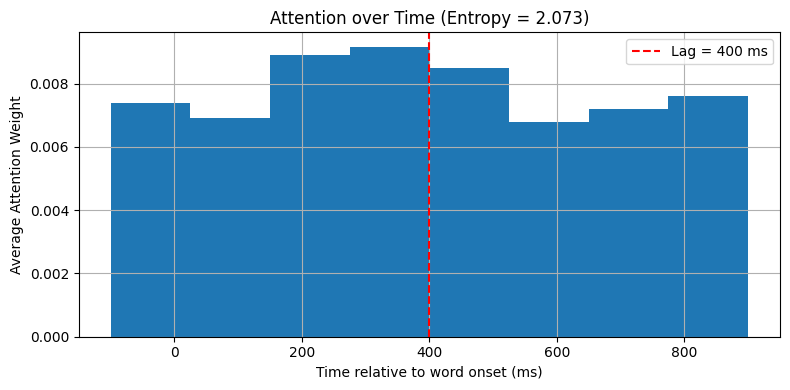

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


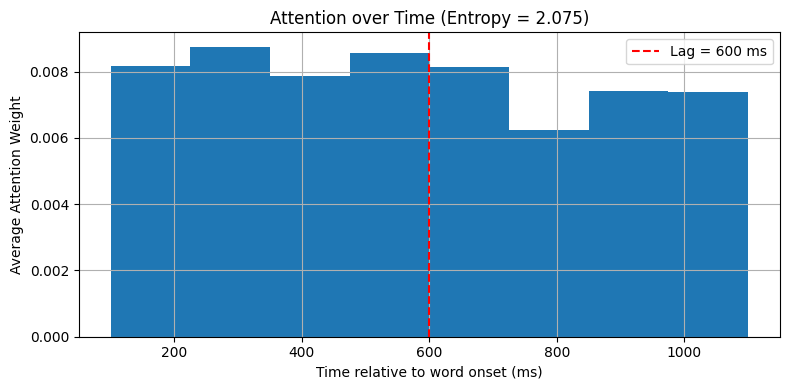

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


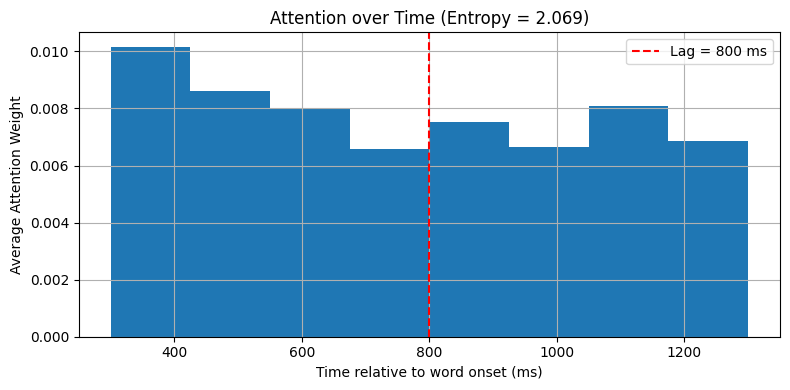

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


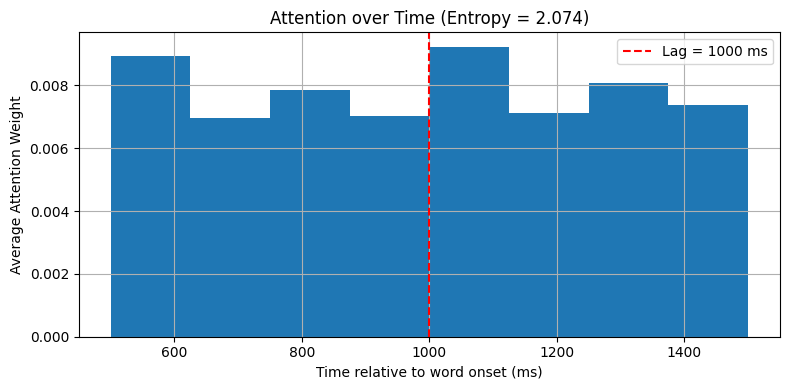

In [7]:
analyze_attention('configs/foundation_model/foundation_model_finetune_attention.yml',
                  'foundation_finetune_attention_no_norm_dim=64_framepatchsize=16_patchsize=2_2025-04-29-03-27-49',
                  batch_size = 32)

In [9]:
analyze_attention('configs/foundation_model/foundation_model_scratch_attention.yml',
                  'foundation_scratch_attention_no_norm_dim=64_framepatchsize=16_patchsize=1_2025-04-29-05-32-21',
                  batch_size = 32)

Using device: cpu
img_size (8, 8) patch_size (2, 2) frames 128 t_patch_size 16
model initialized


RuntimeError: Error(s) in loading state_dict for FoundationModelAttentionPoolingDecoder:
	size mismatch for foundation_model.pos_embed_spatial: copying a param with shape torch.Size([1, 64, 64]) from checkpoint, the shape in current model is torch.Size([1, 16, 64]).
	size mismatch for foundation_model.decoder_pos_embed_spatial: copying a param with shape torch.Size([1, 64, 512]) from checkpoint, the shape in current model is torch.Size([1, 16, 512]).
	size mismatch for foundation_model.patch_embed.proj.weight: copying a param with shape torch.Size([64, 1, 16, 1, 1]) from checkpoint, the shape in current model is torch.Size([64, 1, 16, 2, 2]).
	size mismatch for foundation_model.decoder_pred.weight: copying a param with shape torch.Size([16, 512]) from checkpoint, the shape in current model is torch.Size([64, 512]).
	size mismatch for foundation_model.decoder_pred.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).

## Testing inference time

In [1]:
import torch
import argparse
import os
import subprocess

from ecog_foundation_model.ecog_setup import CheckpointManager
from ecog_foundation_model.config import create_video_mae_experiment_config_from_yaml
from foundation_model.foundation_decoder_utils import create_foundation_model

input_path = '/scratch/gpfs/zparis/ECoG-foundation-model/checkpoints/grad_accum=2-encoder_mask_ratio=0.5-weight_decay=0.01-proj_drop=0.1-drop_path=0.05-lr=5e-05-precision=no-alpha=0.5_29110768/best_checkpoint'

ecog_config = create_video_mae_experiment_config_from_yaml(
    os.path.join(input_path, "experiment_config.yml")
)
model = create_foundation_model(ecog_config, input_path)
model.initialize_mask(None)

img_size (8, 8) patch_size (1, 1) frames 256 t_patch_size 8
model initialized


/home/zparis/.conda/envs/ecog/lib/python3.11/site-packages/ecog_foundation_model/ecog_setup.py:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pat

In [2]:
model.to("cuda")

MaskedAutoencoderViT(
  (masked_input_norm): MaskedBatchNorm(
    (bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  )
  (patch_embed): PatchEmbed(
    (proj): Conv3d(1, 512, kernel_size=(8, 1, 1), stride=(8, 1, 1))
  )
  (blocks): ModuleList(
    (0-9): 10 x Block(
      (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (q): Linear(in_features=512, out_features=512, bias=True)
        (k): Linear(in_features=512, out_features=512, bias=True)
        (v): Linear(in_features=512, out_features=512, bias=True)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.1, inplace=False)
      )
      (drop_path): DropPath(drop_prob=0.050)
      (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=2048, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.1, inp

In [7]:
batch = torch.ones(2, 1, 128, 8, 8).to("cuda")

In [ ]:
import time

In [8]:
model(batch, forward_features=True)

AssertionError: 

In [5]:
!nvidia-smi

Thu May  8 19:44:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          On  |   00000000:E3:00.0 Off |                   On |
| N/A   58C    P0            139W /  300W |   12753MiB /  81920MiB |     N/A      Default |
|                                         |                        |              Enabled |
+-----------------------------------------+-----